In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import jax.numpy as np
from jax import device_get, random, vmap
from jax.config import config; config.update('jax_platform_name', 'cpu')

import numpyro.distributions as dist
from numpyro.distributions.util import softmax
from numpyro.hmc_util import initialize_model, log_density
from numpyro.mcmc import mcmc
from numpyro.handlers import sample, substitute

### model

In [2]:
def funnel_model(dim=10):
    x = sample('x', dist.Normal(0, 3))
    y = sample('y', dist.Normal(np.zeros(dim-1), np.exp(x / 2)))

### run inference

In [3]:
rngs = random.split(random.PRNGKey(1), 4)
init_params, potential_fn, _ = initialize_model(rngs, funnel_model, 10)
samples = mcmc(num_warmup=5000, num_samples=5000, init_params=init_params, num_chains=4,
               potential_fn=potential_fn)
samples_10D = device_get(samples)



                           mean         sd       5.5%      94.5%      n_eff       Rhat
                   x       1.52       2.13      -2.10       4.35      39.22       1.09
                y[0]       0.18      17.10      -6.27       6.72   25153.61       1.00
                y[1]       0.14      12.19      -6.57       6.73   20396.48       1.00
                y[2]       0.08      12.26      -6.53       6.80   25985.86       1.00
                y[3]       0.09      12.90      -6.72       6.49   39962.41       1.00
                y[4]       0.14      16.20      -7.03       6.44   39669.58       1.00
                y[5]       0.04      13.79      -6.98       6.47   34754.69       1.00
                y[6]      -0.00      17.98      -6.70       6.25   52216.34       1.00
                y[7]       0.10      13.90      -6.45       6.42   22256.45       1.00
                y[8]      -0.11      14.69      -6.10       6.92   26402.74       1.00


In [4]:
rngs = random.split(random.PRNGKey(1), 4)
init_params, potential_fn, _ = initialize_model(rngs, funnel_model, 100)
samples = mcmc(num_warmup=5000, num_samples=5000, init_params=init_params, num_chains=4,
               potential_fn=potential_fn)
samples_100D = device_get(samples)



                           mean         sd       5.5%      94.5%      n_eff       Rhat
                   x       0.89       2.32      -2.96       4.33      47.55       1.07
                y[0]       0.03       4.52      -5.77       5.20   35811.40       1.00
                y[1]      -0.04       4.37      -5.39       5.09   43115.33       1.00
                y[2]      -0.02       4.41      -5.66       4.83   36341.24       1.00
                y[3]      -0.03       4.22      -5.68       4.97   37714.74       1.00
                y[4]      -0.02       4.48      -5.29       5.71   40969.94       1.00
                y[5]       0.02       4.55      -5.50       5.59   35952.32       1.00
                y[6]       0.01       4.29      -5.00       6.02   37832.77       1.00
                y[7]       0.03       4.55      -5.51       5.84   37929.26       1.00
                y[8]      -0.03       4.14      -5.30       5.25   32188.91       1.00
                y[9]       0.00       4.4

### plot against ground truth

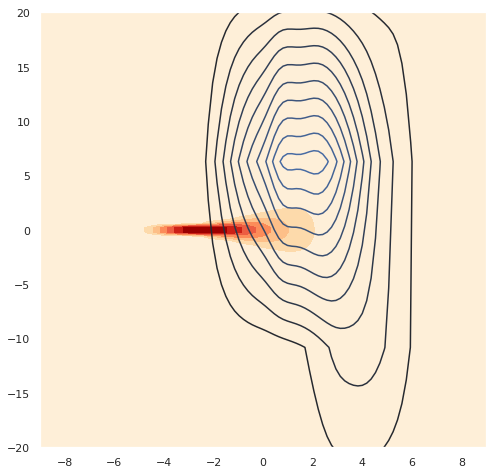

In [5]:
x = np.linspace(-9, 9, 100)
y1 = np.linspace(-20, 20, 100)
X, Y1 = np.meshgrid(x, y1)
P = np.exp(dist.Normal(0, 3).log_prob(X) + dist.Normal(0, np.exp(X / 2)).log_prob(Y1)).clip(a_min=0)

plt.figure(figsize=(8, 8))
plt.contourf(X, Y1, P, cmap='OrRd')
sns.kdeplot(samples_10D['x'], samples_10D['y'][:, 0])
plt.xlim([-9, 9])
plt.ylim([-20, 20]);

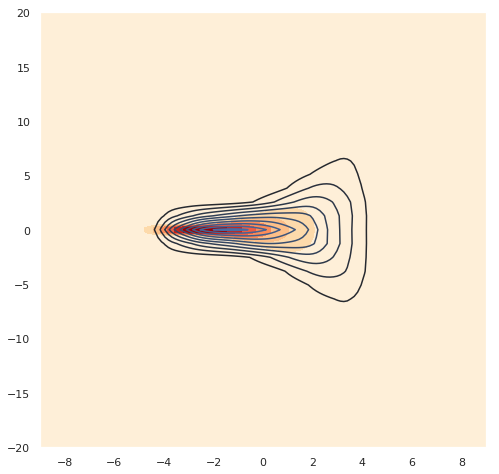

In [6]:
plt.figure(figsize=(8, 8))
plt.contourf(X, Y1, P, cmap='OrRd')
sns.kdeplot(samples_100D['x'], samples_100D['y'][:, 0])
plt.xlim([-9, 9])
plt.ylim([-20, 20]);

### problems

+ It seems that NUTS does not work for the case `dim=10`?

+ Why ground truth does not look like a funnel?

+ Why NeuTra HMC paper (paper of Google Research group) uses funnel with `dim=100`? Does it work for the traditional `dim=10`?